In [15]:
import os
import requests
from datetime import datetime
from typing import List, Dict
import logging
import regex as re

import time
import numpy as np
import pandas as pd
import geopandas as gpd

In [ ]:
df

,date_time,shelter_name,program_name,sector,shelter_address,shelter_city,shelter_postal_code,data_schema,year,capacity_type,capacity_combined,occupancy_combined,occupancy_rate_combined,month,day,weekday,is_weekend,lat,lon
0,2017-01-01 04:00:00,COSTI Reception Centre,COSTI Reception Ctr CITY Program,Co-ed,100 Lippincott Street,Toronto,M5S 2P1,pre_2021,2017,Bed Based Capacity,16.0,16.0,1.000000,1,1,Sunday,True,43.657562,-79.407393
1,2017-01-01 04:00:00,Christie Ossington Men's Hostel,Christie Ossington Extreme Weather Program,Men,973 Lansdowne Avenue,Toronto,M6H 3Z5,pre_2021,2017,Bed Based Capacity,17.0,13.0,0.764706,1,1,Sunday,True,43.666104,-79.446019
2,2017-01-01 04:00:00,Christie Ossington Men's Hostel,Christie Ossington Men's Hostel,Men,973 Lansdowne Avenue,Toronto,M6H 3Z5,pre_2021,2017,Bed Based Capacity,63.0,63.0,1.000000,1,1,Sunday,True,43.666104,-79.446019
3,2017-01-01 04:00:00,Christie Refugee Welcome Centre,Christie Refugee Welcome Ctr - Settlement and ...,Families,43 Christie Street,Toronto,M6G 3B1,pre_2021,2017,Bed Based Capacity,70.0,66.0,0.942857,1,1,Sunday,True,43.665203,-79.418857
4,2017-01-01 04:00:00,Birkdale Residence,Birkdale Residence - Bedded Program,Families,1229 Ellesmere Road,Toronto,M1P 4V8,pre_2021,2017,Bed Based Capacity,160.0,168.0,1.050000,1,1,Sunday,True,43.768282,-79.267447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388713,2025-10-28 04:00:00,YWCA Davenport Shelter,YWCA Davenport - Youth,Youth,348 Davenport Road,Toronto,M5R 1K6,post_2021,2025,Bed Based Capacity,26.0,25.0,0.961538,10,28,Tuesday,False,43.675412,-79.401333
388714,2025-10-28 04:00:00,Youth Without Shelter,Youth without Shelter Emergency Shelter Program,Youth,6 Warrendale Ct,Etobicoke,M9V 1P9,post_2021,2025,Bed Based Capacity,33.0,33.0,1.000000,10,28,Tuesday,False,43.736310,-79.580404
388715,2025-10-28 04:00:00,Youth Without Shelter,Youth without Shelter Stay In School Program,Youth,6 Warrendale Ct,Etobicoke,M9V 1P9,post_2021,2025,Bed Based Capacity,20.0,20.0,1.000000,10,28,Tuesday,False,43.736310,-79.580404
388716,2025-10-28 04:00:00,YouthLink,YouthLink Emergency Program,Youth,747 Warden Ave,Scarborough,M1L 4A1,post_2021,2025,Bed Based Capacity,10.0,10.0,1.000000,10,28,Tuesday,False,43.717903,-79.282891


In [ ]:
import requests
address = "973 Lansdowne Avenue, Toronto, ON, Canada"

r = requests.get("https://maps.googleapis.com/maps/api/geocode/json",
                 params={"address": address, "key": google_api_key})
print(r.json())


{'results': [{'address_components': [{'long_name': '973', 'short_name': '973', 'types': ['street_number']}, {'long_name': 'Lansdowne Avenue', 'short_name': 'Lansdowne Ave', 'types': ['route']}, {'long_name': 'Old Toronto', 'short_name': 'Old Toronto', 'types': ['political', 'sublocality', 'sublocality_level_1']}, {'long_name': 'Toronto', 'short_name': 'Toronto', 'types': ['locality', 'political']}, {'long_name': 'Toronto', 'short_name': 'Toronto', 'types': ['administrative_area_level_3', 'political']}, {'long_name': 'Toronto', 'short_name': 'Toronto', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'Ontario', 'short_name': 'ON', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'Canada', 'short_name': 'CA', 'types': ['country', 'political']}, {'long_name': 'M6H 3Z5', 'short_name': 'M6H 3Z5', 'types': ['postal_code']}], 'formatted_address': '973 Lansdowne Ave, Toronto, ON M6H 3Z5, Canada', 'geometry': {'bounds': {'northeast': {'lat': 43.6662609,

In [ ]:
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
df['lon'] = pd.to_numeric(df['lon'], errors='coerce')
df = df.dropna(subset=['lat', 'lon'])
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['lon'], df['lat']),
    crs="EPSG:4326"
)


In [ ]:
gdf

,date_time,shelter_name,program_name,sector,shelter_address,shelter_city,shelter_postal_code,data_schema,year,capacity_type,capacity_combined,occupancy_combined,occupancy_rate_combined,month,day,weekday,is_weekend,lat,lon,geometry
0,2017-01-01 04:00:00,COSTI Reception Centre,COSTI Reception Ctr CITY Program,Co-ed,100 Lippincott Street,Toronto,M5S 2P1,pre_2021,2017,Bed Based Capacity,16.0,16.0,1.000000,1,1,Sunday,True,43.657562,-79.407393,POINT (-79.40739 43.65756)
1,2017-01-01 04:00:00,Christie Ossington Men's Hostel,Christie Ossington Extreme Weather Program,Men,973 Lansdowne Avenue,Toronto,M6H 3Z5,pre_2021,2017,Bed Based Capacity,17.0,13.0,0.764706,1,1,Sunday,True,43.666104,-79.446019,POINT (-79.44602 43.6661)
2,2017-01-01 04:00:00,Christie Ossington Men's Hostel,Christie Ossington Men's Hostel,Men,973 Lansdowne Avenue,Toronto,M6H 3Z5,pre_2021,2017,Bed Based Capacity,63.0,63.0,1.000000,1,1,Sunday,True,43.666104,-79.446019,POINT (-79.44602 43.6661)
3,2017-01-01 04:00:00,Christie Refugee Welcome Centre,Christie Refugee Welcome Ctr - Settlement and ...,Families,43 Christie Street,Toronto,M6G 3B1,pre_2021,2017,Bed Based Capacity,70.0,66.0,0.942857,1,1,Sunday,True,43.665203,-79.418857,POINT (-79.41886 43.6652)
4,2017-01-01 04:00:00,Birkdale Residence,Birkdale Residence - Bedded Program,Families,1229 Ellesmere Road,Toronto,M1P 4V8,pre_2021,2017,Bed Based Capacity,160.0,168.0,1.050000,1,1,Sunday,True,43.768282,-79.267447,POINT (-79.26745 43.76828)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388713,2025-10-28 04:00:00,YWCA Davenport Shelter,YWCA Davenport - Youth,Youth,348 Davenport Road,Toronto,M5R 1K6,post_2021,2025,Bed Based Capacity,26.0,25.0,0.961538,10,28,Tuesday,False,43.675412,-79.401333,POINT (-79.40133 43.67541)
388714,2025-10-28 04:00:00,Youth Without Shelter,Youth without Shelter Emergency Shelter Program,Youth,6 Warrendale Ct,Etobicoke,M9V 1P9,post_2021,2025,Bed Based Capacity,33.0,33.0,1.000000,10,28,Tuesday,False,43.736310,-79.580404,POINT (-79.5804 43.73631)
388715,2025-10-28 04:00:00,Youth Without Shelter,Youth without Shelter Stay In School Program,Youth,6 Warrendale Ct,Etobicoke,M9V 1P9,post_2021,2025,Bed Based Capacity,20.0,20.0,1.000000,10,28,Tuesday,False,43.736310,-79.580404,POINT (-79.5804 43.73631)
388716,2025-10-28 04:00:00,YouthLink,YouthLink Emergency Program,Youth,747 Warden Ave,Scarborough,M1L 4A1,post_2021,2025,Bed Based Capacity,10.0,10.0,1.000000,10,28,Tuesday,False,43.717903,-79.282891,POINT (-79.28289 43.7179)


In [ ]:
df[df['sector']=='Men']

,date_time,shelter_name,program_name,sector,shelter_address,shelter_city,shelter_postal_code,data_schema,year,capacity_type,capacity_combined,occupancy_combined,occupancy_rate_combined,month,day,weekday,is_weekend,lat,lon
1,2017-01-01 04:00:00,Christie Ossington Men's Hostel,Christie Ossington Extreme Weather Program,Men,973 Lansdowne Avenue,Toronto,M6H 3Z5,pre_2021,2017,Bed Based Capacity,17.0,13.0,0.764706,1,1,Sunday,True,43.666104,-79.446019
2,2017-01-01 04:00:00,Christie Ossington Men's Hostel,Christie Ossington Men's Hostel,Men,973 Lansdowne Avenue,Toronto,M6H 3Z5,pre_2021,2017,Bed Based Capacity,63.0,63.0,1.000000,1,1,Sunday,True,43.666104,-79.446019
6,2017-01-01 04:00:00,Downsview Dells,Downsview Dells Bedded Program,Men,1651 Sheppard Ave West,Toronto,M3M 2X4,pre_2021,2017,Bed Based Capacity,28.0,23.0,0.821429,1,1,Sunday,True,43.740637,-79.494160
16,2017-01-01 04:00:00,Fort York Residence,Fort York Extreme Weather Program,Men,38 Bathrust St,Toronto,M5V 3W3,pre_2021,2017,Bed Based Capacity,19.0,0.0,0.000000,1,1,Sunday,True,43.641175,-79.402516
17,2017-01-01 04:00:00,Fort York Residence,Fort York Residence Bedded Program,Men,38 Bathrust St,Toronto,M5V 3W3,pre_2021,2017,Bed Based Capacity,74.0,74.0,1.000000,1,1,Sunday,True,43.641175,-79.402516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388696,2025-10-28 04:00:00,Etobicoke Hotel Site 1,Salvation Army - New Hope - Hotel 400 - Men,Men,66 Norfinch Dr,North York,M3N 1X1,post_2021,2025,Room Based Capacity,52.0,52.0,1.000000,10,28,Tuesday,False,43.757402,-79.529568
388697,2025-10-28 04:00:00,SA New Hope Leslieville,Salvation Army - New Hope - Men's Hostel,Men,29A Leslie St,Toronto,M4M 3C3,post_2021,2025,Bed Based Capacity,52.0,52.0,1.000000,10,28,Tuesday,False,43.661904,-79.329352
388698,2025-10-28 04:00:00,SA Islington Seniors' Shelter,Salvation Army - Islington Seniors' Shelter Me...,Men,2671 Islington Ave,Toronto,M9V 2X6,post_2021,2025,Bed Based Capacity,46.0,46.0,1.000000,10,28,Tuesday,False,43.739300,-79.565871
388700,2025-10-28 04:00:00,The Scott Mission - Kensington location,Scott Mission - Men's Ministry Overnight Program,Men,346 Spadina Ave.,Toronto,M5T 1J5,post_2021,2025,Bed Based Capacity,71.0,71.0,1.000000,10,28,Tuesday,False,43.654182,-79.398936


In [22]:
import matplotlib.pyplot as plt

NameError: name 'bed_sector_counts' is not defined

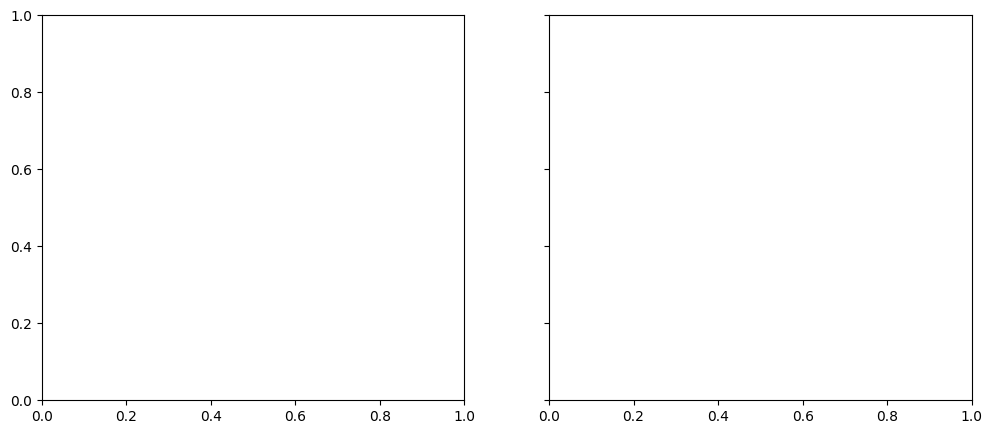

In [24]:
bed_df = gdf[gdf['capacity_type'].str.contains('Bed', case=False, na=False)]
room_df = gdf[gdf['capacity_type'].str.contains('Room', case=False, na=False)]

fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

bed_sector_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Bed-Based Capacity by Sector')
axes[0].set_xlabel('Sector')
axes[0].set_ylabel('Number of Records')
axes[0].tick_params(axis='x', rotation=45)

room_sector_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Room-Based Capacity by Sector')
axes[1].set_xlabel('Sector')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


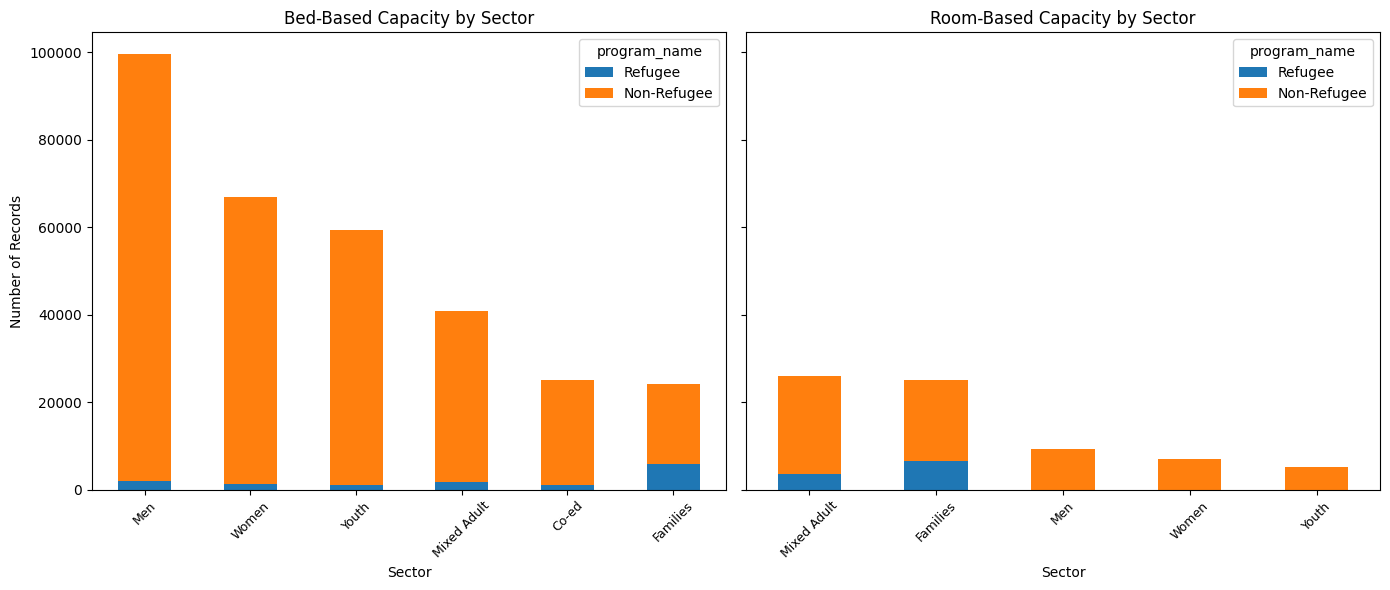

In [ ]:
bed_df = gdf[gdf['capacity_type'].str.contains('Bed', case=False, na=False)]
room_df = gdf[gdf['capacity_type'].str.contains('Room', case=False, na=False)]

bed_counts = (bed_df.groupby(['sector', bed_df['program_name'].str.contains('refugee', case=False, na=False)]).size().unstack(fill_value=0).rename(columns={True: 'Refugee', False: 'Non-Refugee'})[["Refugee", "Non-Refugee"]])

room_counts = (room_df.groupby(['sector', room_df['program_name'].str.contains('refugee', case=False, na=False)]).size().unstack(fill_value=0).rename(columns={True: 'Refugee', False: 'Non-Refugee'})[["Refugee", "Non-Refugee"]])

bed_counts = bed_counts.loc[bed_counts.sum(axis=1).sort_values(ascending=False).index]
room_counts = room_counts.loc[room_counts.sum(axis=1).sort_values(ascending=False).index]
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

bed_counts.plot(kind="bar",stacked=True,ax=axes[0])
axes[0].set_title("Bed-Based Capacity by Sector")
axes[0].set_xlabel("Sector")
axes[0].set_ylabel("Number of Records")
axes[0].tick_params(axis="x", rotation=45, labelsize=9)

room_counts.plot(kind="bar",stacked=True,ax=axes[1])
axes[1].set_title("Room-Based Capacity by Sector")
axes[1].set_xlabel("Sector")
axes[1].tick_params(axis="x", rotation=45, labelsize=9)

plt.tight_layout()
plt.show()


In [ ]:
bed_df = gdf[gdf['capacity_type'].str.contains('Bed', case=False, na=False)]
room_df = gdf[gdf['capacity_type'].str.contains('Room', case=False, na=False)]

def summarize_refugee_counts(df, label):
    summary = df.groupby(['sector', df['program_name'].str.contains('refugee', case=False, na=False)]).size().unstack(fill_value=0).rename(columns={True: 'Refugee_Records', False: 'NonRefugee_Records'}).assign(Capacity_Type=label).reset_index()
    loc_refugee = df[df['program_name'].str.contains('refugee', case=False, na=False)].groupby('sector')['shelter_name'].nunique().rename('Refugee_Locations')
    loc_nonref = df[~df['program_name'].str.contains('refugee', case=False, na=False)].groupby('sector')['shelter_name'].nunique().rename('NonRefugee_Locations')
    loc_total = df.groupby('sector')['shelter_name'].nunique().rename('Total_Locations')
    loc_summary = pd.concat([loc_refugee, loc_nonref, loc_total], axis=1).fillna(0).reset_index()
    summary = summary.merge(loc_summary, on='sector', how='left')
    summary['Total_Records'] = summary['Refugee_Records'] + summary['NonRefugee_Records']
    return summary

bed_summary = summarize_refugee_counts(bed_df, "Bed-Based")
room_summary = summarize_refugee_counts(room_df, "Room-Based")
capacity_summary = pd.concat([bed_summary, room_summary], ignore_index=True)
capacity_summary = capacity_summary.sort_values(by='Total_Records', ascending=False).reset_index(drop=True)
capacity_summary = capacity_summary[['sector', 'Capacity_Type', 'Refugee_Records', 'NonRefugee_Records', 'Total_Records', 'Refugee_Locations', 'NonRefugee_Locations', 'Total_Locations']]

display(capacity_summary.style.set_caption("Shelter Records and Unique Locations by Sector, Capacity Type, and Refugee Status").background_gradient(subset=["Refugee_Records", "NonRefugee_Records", "Total_Records"], cmap="YlGnBu").background_gradient(subset=["Refugee_Locations", "NonRefugee_Locations", "Total_Locations"], cmap="PuBuGn").format(precision=0))


,sector,Capacity_Type,Refugee_Records,NonRefugee_Records,Total_Records,Refugee_Locations,NonRefugee_Locations,Total_Locations
0,Men,Bed-Based,2013,97584,99597,2,47,47
1,Women,Bed-Based,1348,65662,67010,2,37,38
2,Youth,Bed-Based,1137,58238,59375,4,29,32
3,Mixed Adult,Bed-Based,1644,39289,40933,3,46,47
4,Mixed Adult,Room-Based,3657,22377,26034,5,24,27
5,Families,Room-Based,6493,18631,25124,6,21,26
6,Co-ed,Bed-Based,979,23974,24953,1,17,17
7,Families,Bed-Based,5916,18253,24169,5,9,11
8,Men,Room-Based,0,9199,9199,0,8,8
9,Women,Room-Based,0,7090,7090,0,10,10


In [ ]:
demand_est = df.groupby('shelter_name')['occupancy_combined'].max()
print("Approx total demand across all shelters:", demand_est)


Approx total demand across all shelters: shelter_name
18 Fourteen Street                        33.6
213 Carlton Street                        18.0
354 George Street                         60.0
45 The Esplanade                         283.2
885 Scarborough Golf Club Road            79.2
                                         ...  
Youth Agencies Downtown Hotel Program     61.2
Youth Without Shelter                     39.6
Youth Without Shelter                     39.6
YouthLink                                 49.2
YouthLink Shelter                         49.2
Name: occupancy_combined, Length: 213, dtype: float64


In [ ]:
capacity = pd.DataFrame(df.groupby('shelter_name')['capacity_combined'].mean())
max_occupancy = pd.DataFrame(df.groupby('shelter_name')['occupancy_combined'].max())
demand_df = pd.merge(capacity, max_occupancy, left_index=True, right_index=True)

In [ ]:
alpha = 1.5
demand_df['estimate'] = np.where(demand_df['occupancy_combined'] >= demand_df['capacity_combined'],demand_df['capacity_combined'] * alpha,demand_df['occupancy_combined'])
demand_df

,capacity_combined,occupancy_combined,estimate
shelter_name,,,
18 Fourteen Street,23.076923,28.0,34.615385
213 Carlton Street,12.089385,15.0,18.134078
354 George Street,43.736000,50.0,65.604000
45 The Esplanade,199.637346,236.0,299.456019
885 Scarborough Golf Club Road,42.425926,66.0,63.638889
...,...,...,...
Youth Agencies Downtown Hotel Program,26.527594,51.0,39.791391
Youth Without Shelter,25.406913,33.0,38.110370
Youth Without Shelter,21.877401,33.0,32.816102


In [ ]:
capacity = pd.DataFrame(df.groupby(['date_time', 'shelter_name'])['capacity_combined'].max())
max_occupancy = pd.DataFrame(df.groupby(['date_time', 'shelter_name'])['occupancy_combined'].max())
demand_df = pd.merge(capacity, max_occupancy, left_index=True, right_index=True)

In [ ]:
demand_df['estimate'] = np.where(demand_df['occupancy_combined'] >= demand_df['capacity_combined'], demand_df['capacity_combined'] * 1.05,demand_df['occupancy_combined'])
demand_df = demand_df.reset_index()
demand_df

# 

,date_time,shelter_name,capacity_combined,occupancy_combined,estimate
0,2017-01-01 04:00:00,Birkdale Residence,160.0,168.0,168.00
1,2017-01-01 04:00:00,COSTI Reception Centre,16.0,16.0,16.80
2,2017-01-01 04:00:00,Christie Ossington Men's Hostel,63.0,63.0,66.15
3,2017-01-01 04:00:00,Christie Refugee Welcome Centre,70.0,66.0,66.00
4,2017-01-01 04:00:00,Cornerstone Place,50.0,50.0,52.50
...,...,...,...,...,...
252719,2025-11-05 04:00:00,YMCA Sprott House,25.0,24.0,24.00
252720,2025-11-05 04:00:00,YWCA 1st Stop Woodlawn,31.0,31.0,32.55
252721,2025-11-05 04:00:00,YWCA Davenport Shelter,38.0,38.0,39.90
252722,2025-11-05 04:00:00,Youth Without Shelter,33.0,31.0,31.00


In [ ]:
import matplotlib.pyplot as plt
# Filter once for readability
for i in range(len(demand_df['shelter_name'].unique())):
    shelter = demand_df['shelter_name'][i]
    birkdale = demand_df[demand_df['shelter_name'] == shelter].copy()

    # Convert date_time to numeric for regression
    birkdale = birkdale.sort_values('date_time')
    x = (birkdale['date_time'] - birkdale['date_time'].min()).dt.total_seconds() / 3600  # convert to hours
    y = birkdale['estimate']

    # Fit a linear regression line (y = m*x + b)
    m, b = np.polyfit(x, y, 1)
    trend = m * x + b

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(birkdale['date_time'], y, marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Estimated Demand')
    plt.plot(birkdale['date_time'], trend, color='red', linestyle='--', linewidth=2, label=f'Trend Line (slope={m:.2f})')

    # Style & labels
    plt.title(f'Estimated Demand Over Time — {shelter}', fontsize=14, pad=12)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Estimated Occupancy', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

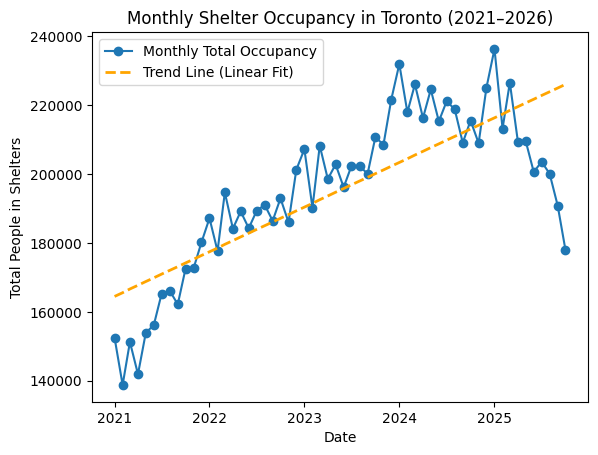

In [ ]:
from sklearn.linear_model import LinearRegression

df_filtered = df[(df['year'] >= 2021) & (df['year'] <= 2026)]

monthly_occupancy = (df_filtered.groupby(['year', 'month'])['occupancy_combined'].sum().reset_index().sort_values(['year', 'month']))
monthly_occupancy['date'] = pd.to_datetime(monthly_occupancy['year'].astype(str) + '-' + monthly_occupancy['month'].astype(str) + '-01')

X = np.arange(len(monthly_occupancy)).reshape(-1, 1)
y = monthly_occupancy['occupancy_combined'].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.plot(monthly_occupancy['date'], monthly_occupancy['occupancy_combined'], 'o-', label='Monthly Total Occupancy')
plt.plot(monthly_occupancy['date'], y_pred, '--', linewidth=2, label='Trend Line (Linear Fit)', color='orange')
plt.title('Monthly Shelter Occupancy in Toronto (2021–2026)')
plt.xlabel('Date')
plt.ylabel('Total People in Shelters')
plt.legend()
plt.show()


In [ ]:
shelter_summary = (
    gdf.groupby("shelter_name")
       .agg(
           capacity=("capacity_combined", "mean"),
           avg_occupancy=("occupancy_combined", "mean"),
           lat=("lat", "mean"),
           lon=("lon", "mean")
       )
       .dropna(subset=["capacity"])
)
shelter_summary["utilization"] = shelter_summary["avg_occupancy"] / shelter_summary["capacity"]
shelter_summary.head()


,capacity,avg_occupancy,lat,lon,utilization
shelter_name,,,,,
18 Fourteen Street,23.076923,20.923077,43.653226,-79.383184,0.906667
213 Carlton Street,12.070175,10.119883,43.663788,-79.369542,0.838421
354 George Street,43.736000,43.272000,-33.867236,151.207421,0.989391
45 The Esplanade,199.637346,199.516975,43.647076,-79.374966,0.999397
885 Scarborough Golf Club Road,42.425926,37.033333,43.772810,-79.219236,0.872894


In [ ]:
df['utilization_rate'].describe()


count    384982.000000
mean          0.945496
std           0.188039
min           0.000000
25%           0.960000
50%           1.000000
75%           1.000000
max           4.350000
Name: utilization_rate, dtype: float64

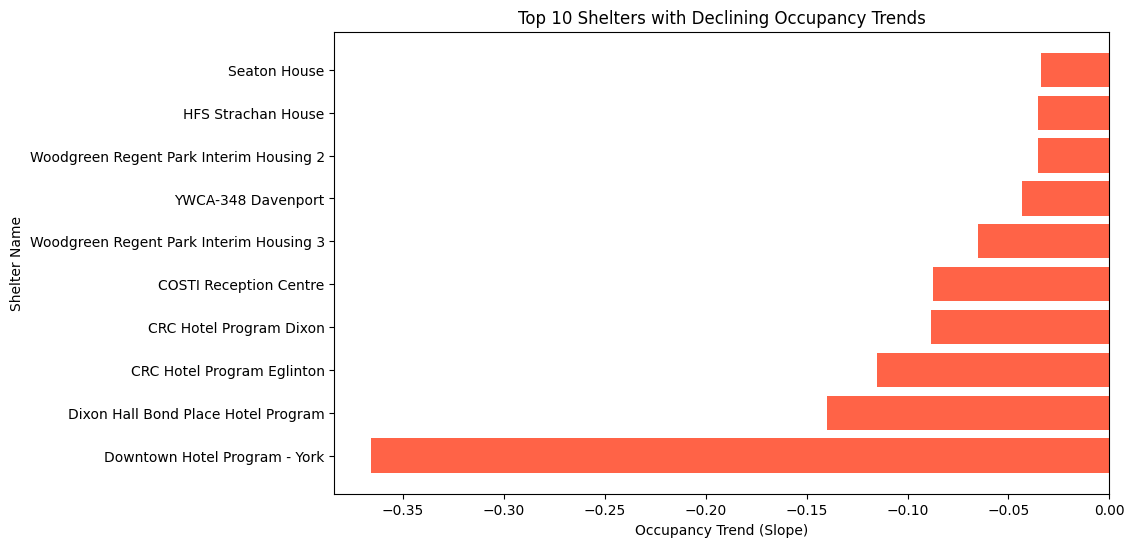

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df['year_month'] = df['date_time'].dt.to_period('M')

trend_df = (df.groupby(['shelter_name', 'year_month'])['occupancy_combined'].mean().reset_index())
trend_df['month_index'] = trend_df['year_month'].apply(lambda x: x.to_timestamp()).map(pd.Timestamp.toordinal)

slopes = []
for name, sub in trend_df.groupby('shelter_name'):
    if len(sub) > 5:
        slope, intercept = np.polyfit(sub['month_index'], sub['occupancy_combined'], 1)
        slopes.append({'shelter_name': name, 'slope': slope, 'start': sub['occupancy_combined'].iloc[0], 'end': sub['occupancy_combined'].iloc[-1]})
        
trend_summary = pd.DataFrame(slopes)
trend_summary['change'] = trend_summary['end'] - trend_summary['start']

declining_shelters = trend_summary.sort_values('slope').head(10)

plt.figure(figsize=(10,6))
plt.barh(declining_shelters['shelter_name'], declining_shelters['slope'], color='tomato')
plt.title('Top 10 Shelters with Declining Occupancy Trends')
plt.xlabel('Occupancy Trend (Slope)')
plt.ylabel('Shelter Name')
plt.show()

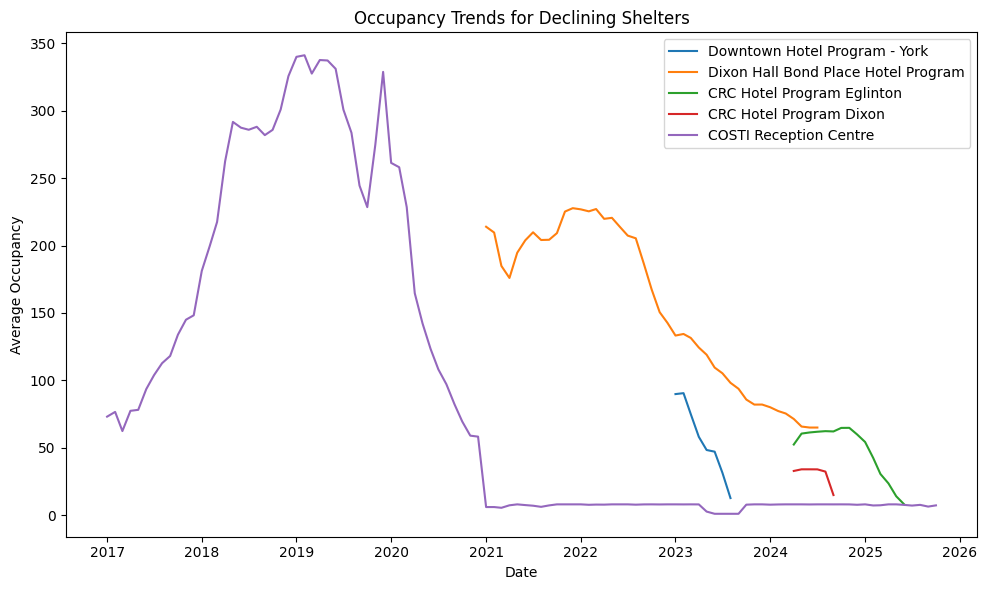

In [ ]:
top_decliners = declining_shelters['shelter_name'].head(5)
plt.figure(figsize=(10,6))
for s in top_decliners:
    subset = trend_df[trend_df['shelter_name'] == s]
    plt.plot(subset['year_month'].dt.to_timestamp(), subset['occupancy_combined'], label=s)

plt.legend()
plt.title("Occupancy Trends for Declining Shelters")
plt.xlabel("Date")
plt.ylabel("Average Occupancy")
plt.tight_layout()
plt.show()


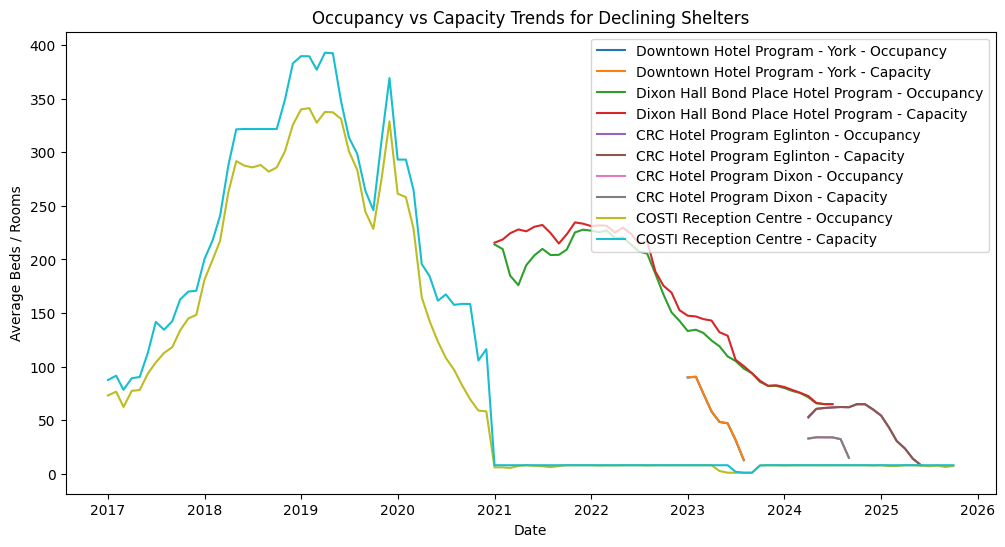

In [ ]:
top_decliners = ["Downtown Hotel Program - York",
                 "Dixon Hall Bond Place Hotel Program",
                 "CRC Hotel Program Eglinton",
                 "CRC Hotel Program Dixon",
                 "COSTI Reception Centre"]

plt.figure(figsize=(12,6))
for shelter in top_decliners:
    subset = df[df['shelter_name'] == shelter]
    monthly = (subset.groupby(subset['date_time'].dt.to_period('M'))[['occupancy_combined', 'capacity_combined']].mean().reset_index())
    monthly['date'] = monthly['date_time'].dt.to_timestamp()
    plt.plot(monthly['date'], monthly['occupancy_combined'], label=f"{shelter} - Occupancy")
    plt.plot(monthly['date'], monthly['capacity_combined'], label=f"{shelter} - Capacity")
plt.title("Occupancy vs Capacity Trends for Declining Shelters")
plt.xlabel("Date")
plt.ylabel("Average Beds / Rooms")
plt.legend()
plt.show()


reason for decline in occupancy rates is cuts in budget resulting in less available capacity

In [ ]:
df

,date_time,shelter_name,program_name,sector,shelter_address,shelter_city,shelter_postal_code,data_schema,year,capacity_type,capacity_combined,occupancy_combined,occupancy_rate_combined,month,day,weekday,is_weekend,lat,lon,utilization_rate
0,2017-01-01 04:00:00,COSTI Reception Centre,COSTI Reception Ctr CITY Program,Co-ed,100 Lippincott Street,Toronto,M5S 2P1,pre_2021,2017,Bed Based Capacity,16.0,16.0,1.000000,1,1,Sunday,True,43.657562,-79.407393,1.000000
1,2017-01-01 04:00:00,Christie Ossington Men's Hostel,Christie Ossington Extreme Weather Program,Men,973 Lansdowne Avenue,Toronto,M6H 3Z5,pre_2021,2017,Bed Based Capacity,17.0,13.0,0.764706,1,1,Sunday,True,43.666104,-79.446019,0.764706
2,2017-01-01 04:00:00,Christie Ossington Men's Hostel,Christie Ossington Men's Hostel,Men,973 Lansdowne Avenue,Toronto,M6H 3Z5,pre_2021,2017,Bed Based Capacity,63.0,63.0,1.000000,1,1,Sunday,True,43.666104,-79.446019,1.000000
3,2017-01-01 04:00:00,Christie Refugee Welcome Centre,Christie Refugee Welcome Ctr - Settlement and ...,Families,43 Christie Street,Toronto,M6G 3B1,pre_2021,2017,Bed Based Capacity,70.0,66.0,0.942857,1,1,Sunday,True,43.665203,-79.418857,0.942857
4,2017-01-01 04:00:00,Birkdale Residence,Birkdale Residence - Bedded Program,Families,1229 Ellesmere Road,Toronto,M1P 4V8,pre_2021,2017,Bed Based Capacity,160.0,168.0,1.050000,1,1,Sunday,True,43.768282,-79.267447,1.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388713,2025-10-28 04:00:00,YWCA Davenport Shelter,YWCA Davenport - Youth,Youth,348 Davenport Road,Toronto,M5R 1K6,post_2021,2025,Bed Based Capacity,26.0,25.0,0.961538,10,28,Tuesday,False,43.675412,-79.401333,0.961538
388714,2025-10-28 04:00:00,Youth Without Shelter,Youth without Shelter Emergency Shelter Program,Youth,6 Warrendale Ct,Etobicoke,M9V 1P9,post_2021,2025,Bed Based Capacity,33.0,33.0,1.000000,10,28,Tuesday,False,43.736310,-79.580404,1.000000
388715,2025-10-28 04:00:00,Youth Without Shelter,Youth without Shelter Stay In School Program,Youth,6 Warrendale Ct,Etobicoke,M9V 1P9,post_2021,2025,Bed Based Capacity,20.0,20.0,1.000000,10,28,Tuesday,False,43.736310,-79.580404,1.000000
388716,2025-10-28 04:00:00,YouthLink,YouthLink Emergency Program,Youth,747 Warden Ave,Scarborough,M1L 4A1,post_2021,2025,Bed Based Capacity,10.0,10.0,1.000000,10,28,Tuesday,False,43.717903,-79.282891,1.000000


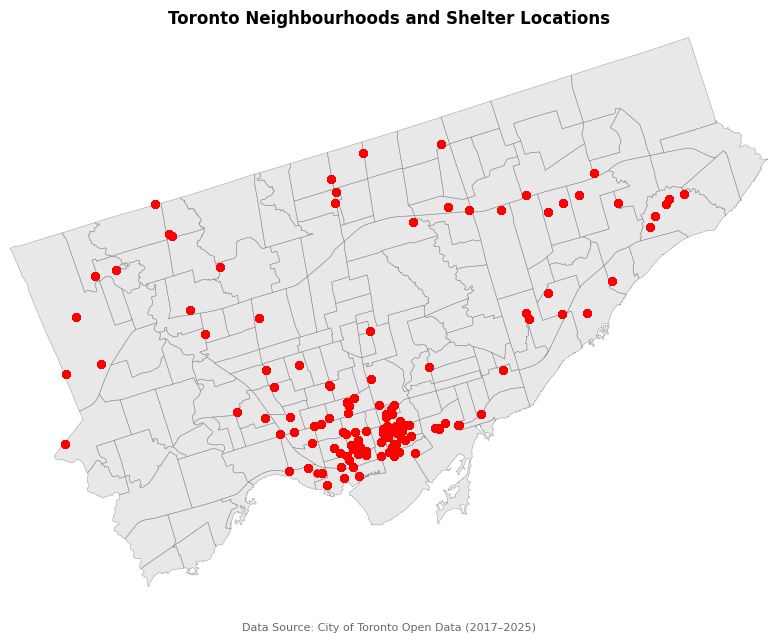

In [ ]:
import geopandas as gpd; import pandas as pd; import matplotlib.pyplot as plt

shapefile_path=r"C:\Users\roanp\Downloads\Neighbourhoods - 4326.geojson"

neighbourhoods=gpd.read_file(shapefile_path); neighbourhoods.columns=neighbourhoods.columns.str.lower()
neighbourhoods=neighbourhoods[['area_name','geometry']]; neighbourhoods['type']='neighbourhood'
gdf=gdf.to_crs(neighbourhoods.crs)
shelter_locations=gdf[['shelter_name','geometry']].copy(); shelter_locations.columns=['area_name','geometry']; shelter_locations['type']='shelter'

minx,miny,maxx,maxy=-79.64,43.58,-79.12,43.85
shelter_locations=shelter_locations.cx[minx:maxx,miny:maxy]

gdf_all=gpd.GeoDataFrame(pd.concat([shelter_locations,neighbourhoods],ignore_index=True),geometry='geometry',crs=neighbourhoods.crs)
fig,ax=plt.subplots(figsize=(8,8))
gdf_all[gdf_all['type']=='neighbourhood'].plot(ax=ax,color='lightgrey',alpha=0.5,edgecolor='white',linewidth=0.3)

gdf_all[gdf_all['type']=='neighbourhood'].boundary.plot(ax=ax,color='grey',linewidth=0.4,alpha=0.7)
gdf_all[gdf_all['type']=='shelter'].plot(ax=ax,color='red',markersize=25,alpha=0.9,zorder=3)
ax.set_title("Toronto Neighbourhoods and Shelter Locations",fontsize=12,weight='bold',pad=10); ax.set_axis_off(); ax.margins(0); plt.tight_layout(pad=1.5)

plt.annotate("Data Source: City of Toronto Open Data (2017–2025)",xy=(0.5,-0.08),xycoords='axes fraction',ha='center',fontsize=8,color='dimgray'); plt.show()


In [ ]:
minx, miny, maxx, maxy = -79.64, 43.58, -79.12, 43.85
gdf = gdf.cx[minx:maxx, miny:maxy]

In [30]:
shelter_summary = gdf.groupby(['shelter_name', 'lat', 'lon'], as_index=False).agg({
    'occupancy_combined': 'mean',
    'capacity_combined': 'mean',
    'occupancy_rate_combined': 'mean'
})
shelter_summary_gdf = gpd.GeoDataFrame(
    shelter_summary,
    geometry=gpd.points_from_xy(shelter_summary['lon'], shelter_summary['lat']),
    crs="EPSG:4326"
)


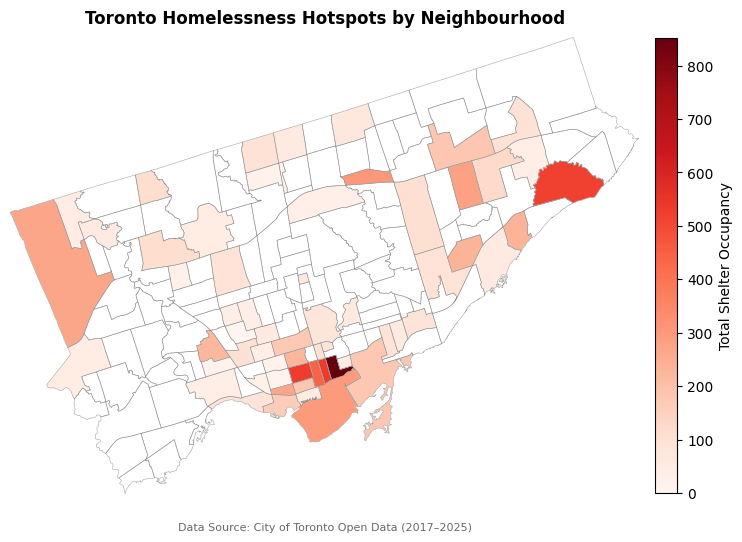

In [62]:
import matplotlib.pyplot as plt; import geopandas as gpd

shelter_summary_gdf=shelter_summary_gdf.to_crs(neighbourhoods.crs); shelters_with_neigh=gpd.sjoin(shelter_summary_gdf,neighbourhoods,how="left",predicate="within")

neighbourhood_activity=(shelters_with_neigh.groupby('area_name',as_index=False).agg({'occupancy_combined':'sum','capacity_combined':'sum','occupancy_rate_combined':'mean'}))
neighbourhoods_heatmap=neighbourhoods.merge(neighbourhood_activity,on='area_name',how='left')
fig,ax=plt.subplots(figsize=(8,8))

neighbourhoods_heatmap.plot(column='occupancy_combined',cmap='Reds',linewidth=0.3,edgecolor='white',legend=True,legend_kwds={'label':"Total Shelter Occupancy",'orientation':'vertical','shrink':0.6,'pad':0.02},ax=ax)

neighbourhoods.boundary.plot(ax=ax,color='grey',linewidth=0.4,alpha=0.7)
ax.set_title("Toronto Homelessness Hotspots by Neighbourhood",fontsize=12,weight='bold',pad=10); ax.set_axis_off(); ax.margins(0); plt.tight_layout(pad=1.5)

plt.annotate("Data Source: City of Toronto Open Data (2017–2025)",xy=(0.5,-0.08),xycoords='axes fraction',ha='center',fontsize=8,color='dimgray'); plt.show()


In [ ]:
gdf = gpd.sjoin(gdf, neighbourhoods[['area_name', 'geometry']], how='left', predicate='within')

In [51]:
gdf['date'] = pd.to_datetime(gdf['date_time']).dt.date

daily = gdf.groupby(['area_name', 'date'], as_index=False).agg({'occupancy_combined': 'sum'})
daily['arrival'] = daily.groupby('area_name')['occupancy_combined'].diff().clip(lower=0)

arrival_rate = daily.groupby('area_name', as_index=False)['arrival'].mean()
arrival_rate.rename(columns={'arrival': 'lambda_arrival_rate'}, inplace=True)

neighbourhoods_rate = neighbourhoods.merge(arrival_rate, on='area_name', how='left')
neighbourhoods_rate.sort_values(by='lambda_arrival_rate', ascending=False)

,area_name,geometry,type,lambda_arrival_rate
11,Yonge-Doris,"MULTIPOLYGON (((-79.40961 43.7618, -79.41094 4...",neighbourhood,5.954545
79,University,"MULTIPOLYGON (((-79.39963 43.65798, -79.39976 ...",neighbourhood,3.818436
82,Moss Park,"MULTIPOLYGON (((-79.36462 43.65601, -79.36446 ...",neighbourhood,2.423650
124,Rustic,"MULTIPOLYGON (((-79.50369 43.70292, -79.50384 ...",neighbourhood,2.248649
6,Bendale-Glen Andrew,"MULTIPOLYGON (((-79.26392 43.75175, -79.26505 ...",neighbourhood,1.526691
...,...,...,...,...
149,Elms-Old Rexdale,"MULTIPOLYGON (((-79.54677 43.73156, -79.54632 ...",neighbourhood,NaN
150,Rexdale-Kipling,"MULTIPOLYGON (((-79.56419 43.71229, -79.5667 4...",neighbourhood,NaN
155,Pelmo Park-Humberlea,"MULTIPOLYGON (((-79.53225 43.73505, -79.52938 ...",neighbourhood,NaN
156,Humbermede,"MULTIPOLYGON (((-79.52813 43.74425, -79.52721 ...",neighbourhood,NaN
